<a href="https://colab.research.google.com/github/BrunoLoducca/Machine-Learning---Dados-com-Altas-Dimens-es/blob/main/Otimiza%C3%A7%C3%A3o_com_explora%C3%A7%C3%A3o_alet%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from datetime import datetime
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC


!apt-get install graphviz # Instala o graphviz na linha de comando. 
!pip install graphviz # Instala o graphviz
!pip install seaborn==0.9.0


uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"

dados = pd.read_csv(uri)


Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-1

In [ ]:
a_renomear = {'mileage_per_year': 'milhas_por_ano', 
              'model_year': 'ano_do_modelo',  
              'price': 'preco', 
              'sold': 'vendido'}

dados = dados.rename(columns=a_renomear)

ano_atual = datetime.today().year

dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo

a_trocar = {'yes': 1, 
            'no': 0}

dados.vendido = dados.vendido.map(a_trocar) # Para alterar valores de uma coluna, a chama como variável, 
                                            # depois a chama novamente junto da função map, que irá 
                                            # requerer um argumento do mapeamento dos valores que se deseja alterar. 

dados['km_por_ano'] = dados.milhas_por_ano * 1.60934

dados = dados.drop(columns=['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'])

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-1

In [ ]:
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


In [ ]:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

# Criando a coluna modelo_do_carro e a geração dos valores de maneira aleatória. 
dados["modelo_do_carro"] = dados.idade_do_modelo + np.random.randint(-2,3)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo_do_carro
0,30941.02,1,22,35085.22134,24
1,40557.96,1,24,12622.05362,26
2,89627.50,0,16,11440.79806,18
3,95276.14,0,7,43167.32682,9
4,117384.68,1,8,12770.11290,10


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

SEED = 5
np.random.seed(SEED)

# Os valores dos hiperparâmetros, 
# que depois serão combinados um a um. 
espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}

# criterion é o critéria de separação pelo qual
# se separam os ramos da árvore. 

# Grid requere para seu funcionamento o estimador, 
# a definição dos hiperparâmetros, que aqui defini
# através do dicionário acima, e depois a separação
# e o tipo de separação, passando o cv. 

# O GridSearchCV, após a nomeação do modelo, usa a validação cruzada
# e ao mesmo tempo combina os hiperparâmetros uns a uns, retornando ao fim
# o resultado das médias do tempo de score ou treino, bem como os valores
# do treino e teste, por exemplo, para cada combinação feita
busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 10))

# O resultado da validação cruzada e combinação
# dos hiperparâmetros, combinados um a um, são treinados
# com os valores x (as features) e y (a classficação).
busca.fit(x, y)

# Gerando o dataframe. 
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

# O dataframe abaixo irá mostrar uma tabela semelhante a que
# estava usando, mostrando as combinações dos hiperparâmetros, 
# o valor do treino e teste, bem como os respectivos tempos. 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016459,0.003497,0.003082,0.000204,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.761,0.799,0.791,0.79,0.798,0.786,0.777,0.791,0.788,0.788,0.7869,0.010416,1
1,0.016660,0.002595,0.003610,0.001746,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.761,0.799,0.791,0.79,0.798,0.786,0.777,0.791,0.788,0.788,0.7869,0.010416,1
2,0.016319,0.002121,0.003133,0.000246,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.761,0.799,0.791,0.79,0.798,0.786,0.777,0.791,0.788,0.788,0.7869,0.010416,1
3,0.015951,0.001545,0.003505,0.000826,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.761,0.799,0.791,0.79,0.798,0.786,0.777,0.791,0.788,0.788,0.7869,0.010416,1
4,0.013005,0.002397,0.002699,0.001659,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.761,0.799,0.791,0.79,0.798,0.786,0.777,0.791,0.788,0.788,0.7869,0.010416,1


In [ ]:
print(" A melhor pontuação foi de: %.2f" % (busca.best_score_*100),"%")
print(" O melhor estimador: ", busca.best_estimator_)

 A melhor pontuação foi de 78.69 %
 O melhor estimador:  DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)


In [ ]:
from sklearn.model_selection import cross_val_score

SEED = 5
np.random.seed(SEED)

# Para eu saber a acurácia de maneira correta, usado uma validação 
# cruzada, é ao invés de já pedir para predizer e depois comparar com o y, 
# cruzar novamente os dados por meio do cross_val_score. 
# Para tanto passo o modelo que irá predizer, que aqui é o "busca", 
# x e y, bem como o "cv", que armazena o método de separação. 
scores = cross_val_score(busca, x, y, cv= KFold(n_splits=10))
scores


array([0.761, 0.799, 0.791, 0.79 , 0.798, 0.786, 0.777, 0.791, 0.788,
       0.788])

In [ ]:
def imprime_score(scores):
  
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Acurácia média %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

imprime_score(scores)

Accuracy médio 78.69
Intervalo [76.61, 80.77]


In [ ]:
previsao = busca.predict(x)
acuracia = accuracy_score(y, previsao)*100
print("A acurácia do estimador é de: %.2f" % acuracia, "%")

A acurácia do estimador é de: 78.75 %


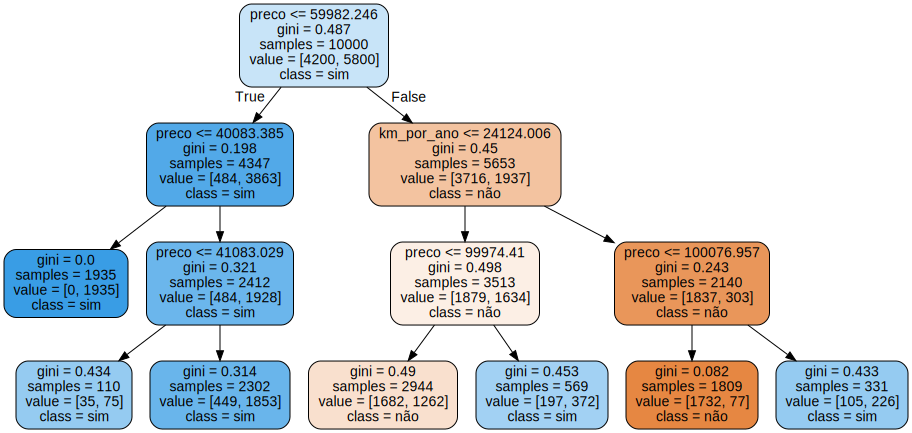

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

melhor = busca.best_estimator_

features = x.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names=features)
graph = graphviz.Source(dot_data)
graph

# Acima temos o uso de validação cruzada com exploração de hiperparâmetros com o uso do GridSeachCV.

# Usando Busca aleatóra. 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

SEED = 5
np.random.seed(SEED)

# Os valores dos hiperparâmetros, 
# que depois serão combinados um a um. 
espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]}

# O RandomSizedSearchCV, após a nomeação do modelo, usa a validação cruzada
# e ao mesmo tempo combina os hiperparâmetros uns a uns, retornando ao fim
# o resultado das médias do tempo de score ou treino, bem como os valores
# do treino e teste, por exemplo, para cada combinação feita

# O parâmetro n_inter define a quantidade de interações. 

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros, n_iter=16, 
                    cv = KFold(n_splits = 10), 
                    random_state=SEED)

# O resultado da validação cruzada e combinação
# dos hiperparâmetros, combinados um a um, são treinados
# com os valores x (as features) e y (a classficação).
busca.fit(x, y)

# Gerando o dataframe. 
resultados = pd.DataFrame(busca.cv_results_)

# O cros_val
scores = cross_val_score(busca, x, y, cv= KFold(n_splits=10))

def imprime_score(scores):
  
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Acurácia média %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

imprime_score(scores)



Acurácia média 78.69
Intervalo [76.61, 80.77]


In [ ]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=64,
                       min_samples_split=64)


In [ ]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media.iterrows():
  print("%.3f +- (%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

# Isso me retorna os valores que eu quero de fato ver de maneira
# mais simples do que o dataframe lá em cima. 


0.787 +- (0.021) {'min_samples_split': 64, 'min_samples_leaf': 64, 'max_depth': 3, 'criterion': 'entropy'}
0.787 +- (0.021) {'min_samples_split': 32, 'min_samples_leaf': 64, 'max_depth': 3, 'criterion': 'gini'}
0.787 +- (0.021) {'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 3, 'criterion': 'entropy'}
0.787 +- (0.021) {'min_samples_split': 128, 'min_samples_leaf': 32, 'max_depth': 3, 'criterion': 'entropy'}
0.787 +- (0.021) {'min_samples_split': 128, 'min_samples_leaf': 64, 'max_depth': 3, 'criterion': 'gini'}
0.787 +- (0.021) {'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 3, 'criterion': 'gini'}
0.787 +- (0.021) {'min_samples_split': 64, 'min_samples_leaf': 32, 'max_depth': 3, 'criterion': 'entropy'}
0.787 +- (0.021) {'min_samples_split': 128, 'min_samples_leaf': 64, 'max_depth': 3, 'criterion': 'entropy'}
0.787 +- (0.021) {'min_samples_split': 128, 'min_samples_leaf': 32, 'max_depth': 3, 'criterion': 'gini'}
0.787 +- (0.021) {'min_samples_split': 32, 'm